## Profile of Census Tracts Along AC Transit 20
Description: AC Transit 20 runs along several census tracts that lie within the cities of Oakland and Alameda, California. This profile is the result of an analysis of the general demographics, transportation characteristics, and housing characteristics of these census tracts.

Author: Jackson Zeng

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [7]:
geom_data = pd.read_csv('tracts_20.csv')

In [8]:
data = pd.read_csv('AC_Transit_20_General_Demographics_1.csv')

Renamed the "GEOID" column in tracts_19.csv to "FIPS"

In [9]:
geom_data = geom_data.rename(columns = {"GEOID":"FIPS"})
geom_data = geom_data[["FIPS", "geometry"]]

Merged the two tables together using the "FIPS" columns

In [10]:
joined = data.merge(right = geom_data, on='FIPS')
joined.head()

,FIPS,Qualifying Name,File identification,State Postal Abbreviation,Summary Level,Geographic Component,Logical Record Number,US,Census Region,Census Division,...,Workers 16 Years and Over: Motorcycle,Workers 16 Years and Over: Bicycle,Workers 16 Years and Over: Walked,Workers 16 Years and Over: Other Means,Workers 16 Years and Over: Worked At Home,Renter-Occupied Housing Units,Renter-Occupied Housing Units: 30 to 49 Percent,Renter-Occupied Housing Units: 50 percent or More,Median Gross Rent,geometry
0,6001402600,"Census Tract 4026, Alameda County, California",ACSSF,ca,140,0,2839,NaN,NaN,NaN,...,0,5,91,41,66,517,133,116,1061.0,POLYGON ((-13612510.45838046 4551475.078864686...
1,6001402700,"Census Tract 4027, Alameda County, California",ACSSF,ca,140,0,2840,NaN,NaN,NaN,...,0,49,86,6,148,477,71,105,1846.0,POLYGON ((-13612229.26534672 4552468.518270037...
2,6001402801,"Census Tract 4028.01, Alameda County, California",ACSSF,ca,140,0,2841,NaN,NaN,NaN,...,32,52,214,16,433,1497,295,319,1971.0,POLYGON ((-13611476.85690844 4553015.366054876...
3,6001402802,"Census Tract 4028.02, Alameda County, California",ACSSF,ca,140,0,2842,NaN,NaN,NaN,...,15,12,33,14,95,671,195,227,530.0,POLYGON ((-13611662.76045807 4552162.064995428...
4,6001402900,"Census Tract 4029, Alameda County, California",ACSSF,ca,140,0,2843,NaN,NaN,NaN,...,0,19,96,0,142,1025,228,222,1201.0,"POLYGON ((-13611160.5982351 4551847.308131741,..."


0     POLYGON ((-13612510.45838046 4551475.078864686...
1     POLYGON ((-13612229.26534672 4552468.518270037...
2     POLYGON ((-13611476.85690844 4553015.366054876...
3     POLYGON ((-13611662.76045807 4552162.064995428...
4     POLYGON ((-13611160.5982351 4551847.308131741,...
5     POLYGON ((-13611580.1613959 4551011.853769903,...
6     POLYGON ((-13612084.43868919 4551306.157106004...
7     POLYGON ((-13611040.9297825 4550737.704104832,...
8     POLYGON ((-13611488.2114965 4550014.045666866,...
9     POLYGON ((-13610515.39046646 4552126.841059468...
10    POLYGON ((-13610696.95255595 4551441.970547473...
11    POLYGON ((-13605270.68397723 4551339.969415342...
12    POLYGON ((-13606678.87553576 4551611.739842022...
13    POLYGON ((-13610739.69924041 4549621.597873631...
14    POLYGON ((-13607547.61284191 4548911.25710321,...
15    POLYGON ((-13607195.17533406 4548929.427024485...
16    POLYGON ((-13606686.44526114 4548581.386992431...
17    POLYGON ((-13606621.76863698 4549805.70560

Added a 0 to the beginnning of the FIPS values as it was omitted when the data was read in

In [6]:
joined['FIPS'] = joined['FIPS'].astype(str)
joined['FIPS'] = '0' + joined['FIPS']
joined.head()

,FIPS,Qualifying Name,File identification,State Postal Abbreviation,Summary Level,Geographic Component,Logical Record Number,US,Census Region,Census Division,...,Workers 16 Years and Over: Motorcycle,Workers 16 Years and Over: Bicycle,Workers 16 Years and Over: Walked,Workers 16 Years and Over: Other Means,Workers 16 Years and Over: Worked At Home,Renter-Occupied Housing Units,Renter-Occupied Housing Units: 30 to 49 Percent,Renter-Occupied Housing Units: 50 percent or More,Median Gross Rent,geometry
0,06001402600,"Census Tract 4026, Alameda County, California",ACSSF,ca,140,0,2839,NaN,NaN,NaN,...,0,5,91,41,66,517,133,116,1061.0,POLYGON ((-13612510.45838046 4551475.078864686...
1,06001402700,"Census Tract 4027, Alameda County, California",ACSSF,ca,140,0,2840,NaN,NaN,NaN,...,0,49,86,6,148,477,71,105,1846.0,POLYGON ((-13612229.26534672 4552468.518270037...
2,06001402801,"Census Tract 4028.01, Alameda County, California",ACSSF,ca,140,0,2841,NaN,NaN,NaN,...,32,52,214,16,433,1497,295,319,1971.0,POLYGON ((-13611476.85690844 4553015.366054876...
3,06001402802,"Census Tract 4028.02, Alameda County, California",ACSSF,ca,140,0,2842,NaN,NaN,NaN,...,15,12,33,14,95,671,195,227,530.0,POLYGON ((-13611662.76045807 4552162.064995428...
4,06001402900,"Census Tract 4029, Alameda County, California",ACSSF,ca,140,0,2843,NaN,NaN,NaN,...,0,19,96,0,142,1025,228,222,1201.0,"POLYGON ((-13611160.5982351 4551847.308131741,..."


Removed columns with null values

In [7]:
joined.columns[joined.isna().all()].tolist()

['US',
 'Census Region',
 'Census Division',
 'State (Census Code)',
 'County Subdivision (FIPS)',
 'Place (FIPS Code)',
 'Block Group',
 'Consolidated City',
 'American Indian Area/AlaskaNative Area/ Hawaiian Home Land(Census)',
 'American Indian Area/AlaskaNative Area/ Hawaiian Home Land(FIPS)',
 'American Indian Trust Land/Hawaiian Home Land Indicator',
 'American Indian TribalSubdivision (Census)',
 'American Indian TribalSubdivision (FIPS)',
 'Alaska Native RegionalCorporation (FIPS)',
 'Metropolitan and MicropolitanStatistical Area',
 'Combined Statistical Area',
 'Metropolitan Statistical Area-Metropolitan Division',
 'Metropolitan Area Central City',
 'Metropolitan/MicropolitanIndicator Flag',
 'New England City and Town Area',
 'New England City and TownCombined Statistical Area',
 'New England City and Town AreaDivision',
 'Urban Area',
 'Urban Area Central Place',
 'Current Congressional District ***',
 'State Legislative District Upper',
 'State Legislative District Lower',

In [8]:
joined = joined.dropna(axis=1,how="all")

In [9]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 66 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   FIPS                                                                 28 non-null     object 
 1   Qualifying Name                                                      28 non-null     object 
 2   File identification                                                  28 non-null     object 
 3   State Postal Abbreviation                                            28 non-null     object 
 4   Summary Level                                                        28 non-null     int64  
 5   Geographic Component                                                 28 non-null     int64  
 6   Logical Record Number                                                28 non-null     int64  
 7   State (FIP

## General Demographics

In [31]:
white_pop = joined[['FIPS','Total Population: White Alone']].sort_values('FIPS', ascending = True).head()
white_pop

,FIPS,Total Population: White Alone
0,6001402600,197
1,6001402700,616
2,6001402801,990
3,6001402802,284
4,6001402900,426


In [ ]:
joined.value_counts('FIPS').reset_index(name = 'count')

Calculated percent of race in the population within each tract

In [10]:
joined['PCT_White'] = joined['Total Population: White Alone']/joined['Total Population:']*100
joined['PCT_Black'] = joined['Total Population: Black or African American Alone']/joined['Total Population:']*100
joined['PCT_Asian'] = joined['Total Population: Asian Alone']/joined['Total Population:']*100
joined['PCT_Native'] = joined['Total Population: American Indian and Alaska Native Alone']/joined['Total Population:']*100

In [11]:
joined['geometry'] = gpd.GeoSeries.from_wkt(joined['geometry'])
geo_df = gpd.GeoDataFrame(joined, geometry='geometry')

### Percent Black Population

<AxesSubplot: >

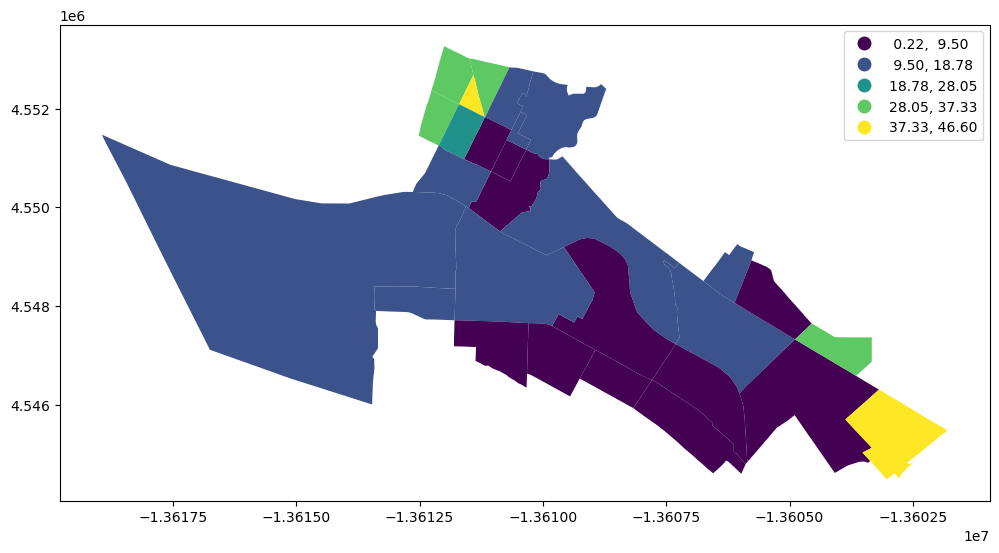

In [12]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Black',
                 legend=True, 
                 scheme='equal_interval')

### Percent White Population

<AxesSubplot: >

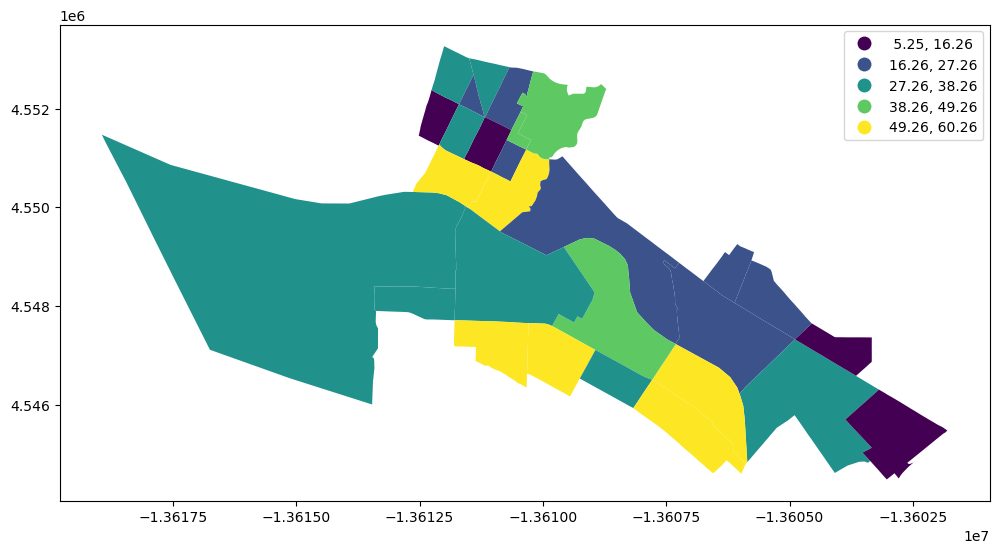

In [13]:
geo_df.plot(figsize=(12,10),
                 column='PCT_White',
                 legend=True, 
                 scheme='equal_interval')

### Percent Asian Population

<AxesSubplot: >

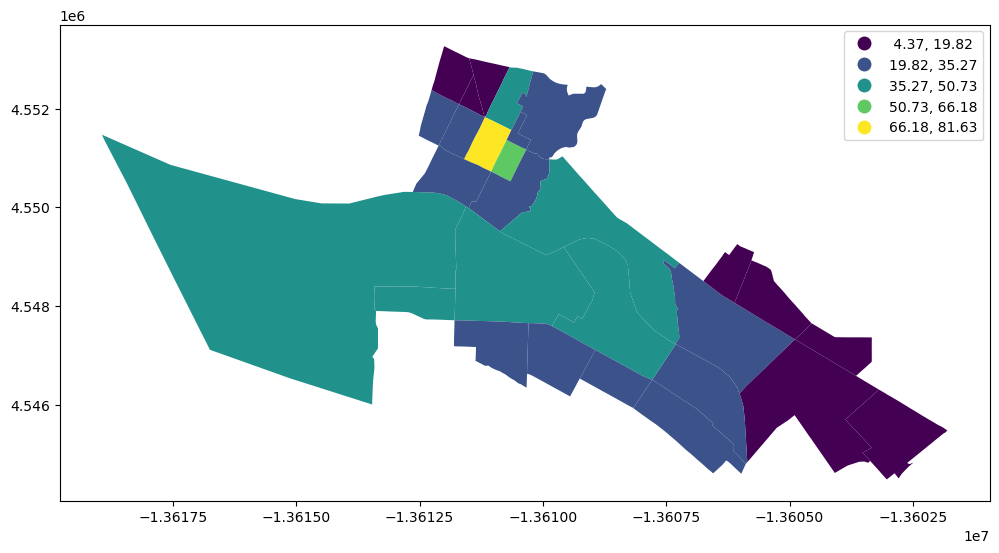

In [14]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Asian',
                 legend=True, 
                 scheme='equal_interval')

### Percent Native Population

<AxesSubplot: >

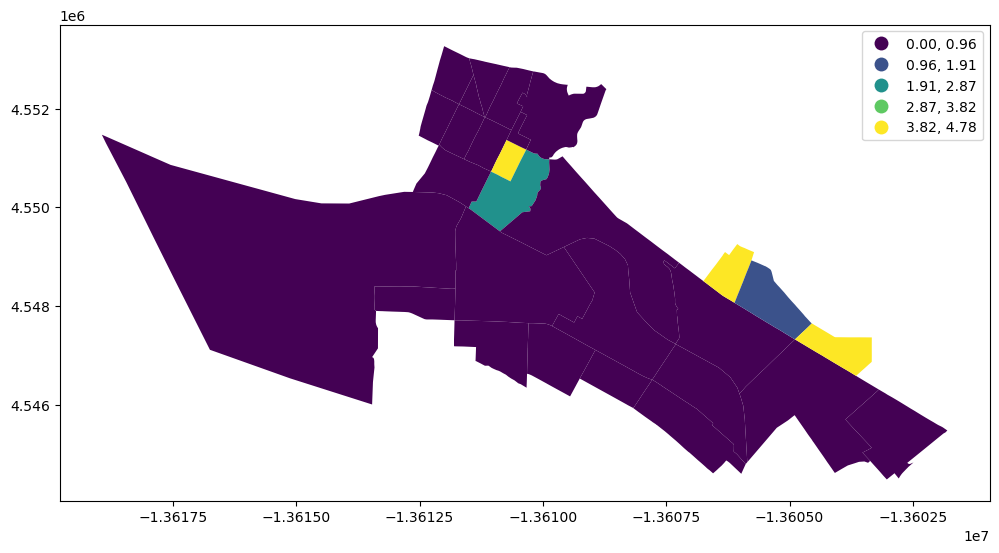

In [15]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Native',
                 legend=True, 
                 scheme='equal_interval')

### Percent Total Population 65 Years and Over

In [16]:
joined['PCT_Total Population: 65 and Over'] = (joined['Total Population: 65 to 74 Years'] + joined['Total Population: 75 to 84 Years'] + joined['Total Population: 85 Years and Over']) / joined['Total Population:'] * 100

<AxesSubplot: >

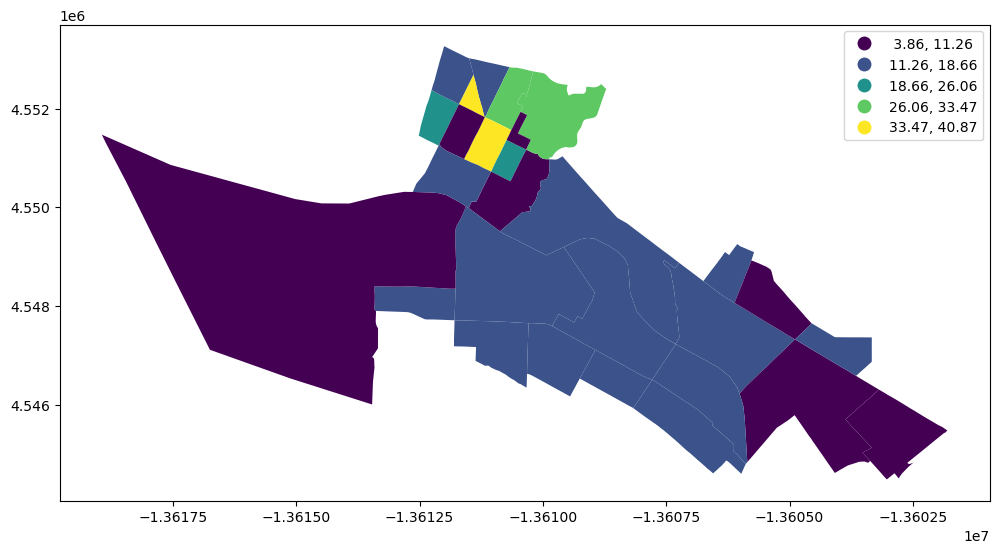

In [17]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Total Population: 65 and Over',
                 legend=True, 
                 scheme='equal_interval')

### Percent Low-Income Households (Less Than $40,000)

In [18]:
joined['PCT_Low-Income Households'] = (joined['Households: Less than $10,000'] + joined['Households: $10,000 to $14,999'] + joined['Households: $15,000 to $19,999'] + joined['Households: $20,000 to $24,999'] + joined['Households: $25,000 to $29,999'] + joined['Households: $30,000 to $34,999']) / joined['Households:'] * 100

<AxesSubplot: >

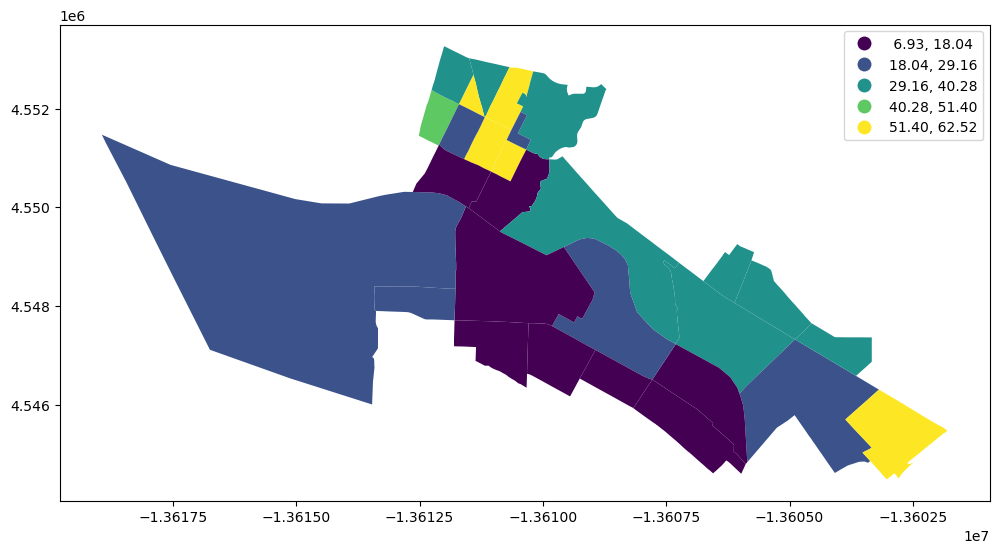

In [19]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Low-Income Households',
                 legend=True, 
                 scheme='equal_interval')

### Top 5 Tracts with Lowest Median Income

<AxesSubplot: title={'center': 'Top 5 Tracts with Lowest Median Household Income (In 2021 Inflation Adjusted Dollars)'}, ylabel='FIPS'>

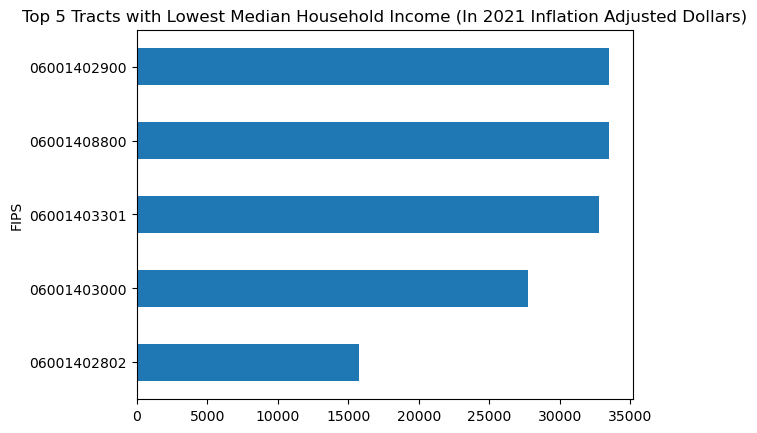

In [20]:
median_income_sorted = geo_df.sort_values(by="Median Household Income (In 2021 Inflation Adjusted Dollars)", ascending = True).head(5)
median_income_sorted.plot.barh(x='FIPS',
                            y="Median Household Income (In 2021 Inflation Adjusted Dollars)", 
                            title='Top 5 Tracts with Lowest Median Household Income (In 2021 Inflation Adjusted Dollars)',
                            legend=False)

## Transportation Characteristics

### Percent Workers 16 Years and Over Using Public Transportation

In [21]:
joined['PCT_Public Transit'] = joined['Workers 16 Years and Over: Public Transportation (Includes Taxicab)'] / joined['Workers 16 Years and Over:'] * 100

<AxesSubplot: >

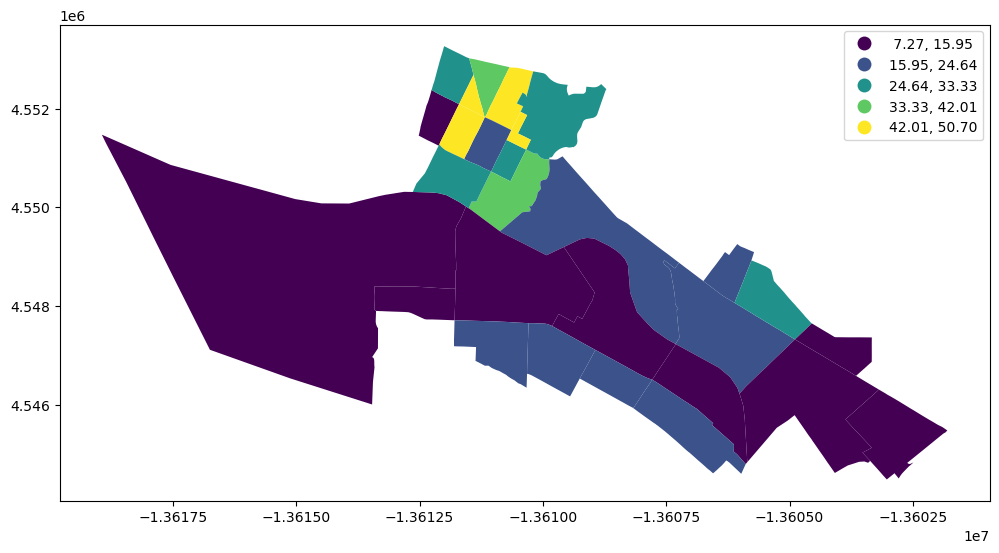

In [22]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Public Transit',
                 legend=True, 
                 scheme='equal_interval')

### Percent Workers 16 Years and Over Driving Alone

In [23]:
joined['PCT_Drive Alone'] = joined['Workers 16 Years and Over: Drove Alone'] / joined['Workers 16 Years and Over:'] * 100

<AxesSubplot: >

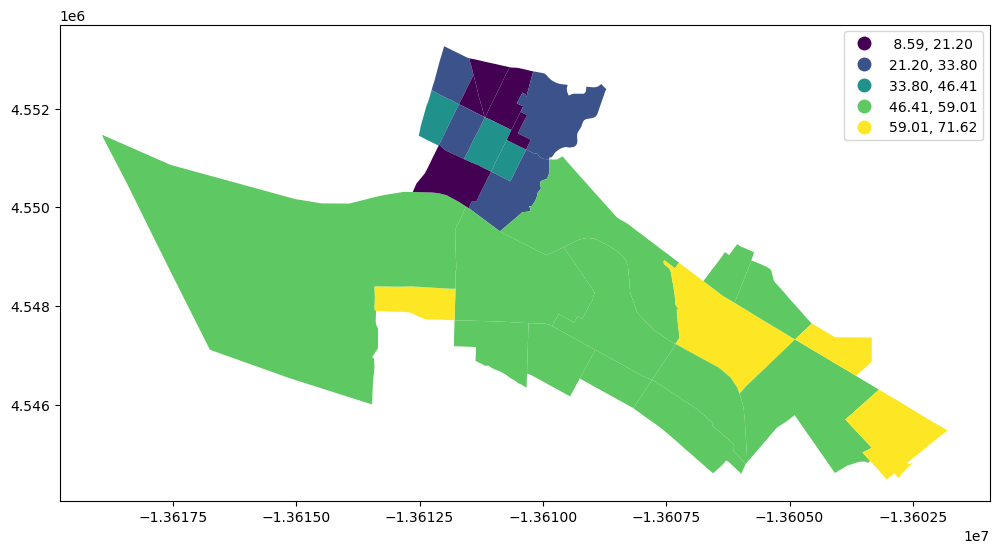

In [24]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Drive Alone',
                 legend=True, 
                 scheme='equal_interval')

## Housing Characteristics

### Median Gross Rent

<AxesSubplot: >

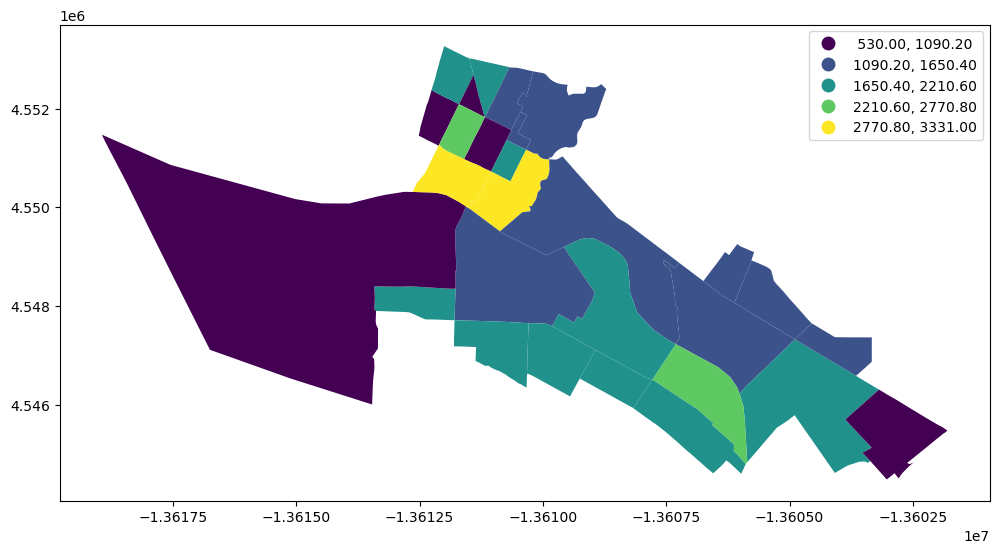

In [25]:
geo_df.plot(figsize=(12,10),
            column='Median Gross Rent',
            legend=True, 
            scheme='equal_interval'
            )

### Top 5 Tracts with Most Renter-Occupied Housing Units

<AxesSubplot: title={'center': 'Top 5 Census Tracts with Most Renter-Occupied Housing Units'}, ylabel='FIPS'>

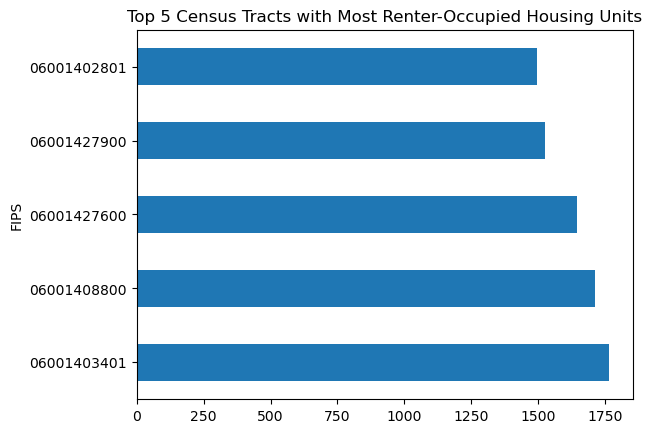

In [26]:
renter_housing_units_sorted = geo_df.sort_values(by="Renter-Occupied Housing Units", ascending = False).head(5)
renter_housing_units_sorted.plot.barh(x='FIPS',
                            y="Renter-Occupied Housing Units", 
                            title='Top 5 Census Tracts with Most Renter-Occupied Housing Units',
                            legend=False)

In [ ]:
fig = px.bar(arrest_by_charge.head(20),
       x='grp_description',
       y='count',
       title='LAPD Arrests by Charge Type in January, 2023')

fig.show()